In [785]:
import torch
import os 
import numpy as np
from albumentations.augmentations import transforms
from albumentations.core.composition import Compose, OneOf
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import cv2
from albumentations import Compose, HorizontalFlip, ElasticTransform, Rotate, ShiftScaleRotate, Affine

alpha=0.5,alpha_affine=0.5,sigma=5,p=1

In [786]:
transformations = Compose([
    HorizontalFlip(p=0),  
    ElasticTransform(alpha=1.2, alpha_affine=4, sigma=5, p=1),
    ToTensorV2()
])

In [787]:
transformations = Compose([
            Rotate(limit=30, p=0.5),  # Rotate by up to 80 degrees
            HorizontalFlip(p=0.15), # Horizontal flip
            ElasticTransform(alpha=1.1, alpha_affine=0.5, sigma=5, p=0.5),  # Elastic transform
            ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=30, p=0.5),  # Shift, scale, and rotate
            Affine(shear=[-15,15], p=0.5,translate_px=(-15, 15)),
            ToTensorV2()
])

In [788]:
image = r'E:\preprocessing_lidc\data\Image\LIDC-IDRI-0001\0001_NI000_slice003.npy'
mask = r'E:\preprocessing_lidc\data\Mask\LIDC-IDRI-0001\0001_MA000_slice003.npy'

In [789]:
image0= np.load(image)
mask0 = np.load(mask)

In [790]:
image0 = image0.reshape(512,512,1)
mask0 = mask0.reshape(512,512,1)

In [791]:
print(image0.shape,mask0.shape)

(512, 512, 1) (512, 512, 1)


In [792]:
mask0 = mask0.astype('uint8')

In [793]:
augmented = transformations(image=image0,mask=mask0)

In [794]:
augment0 = augmented['image']
mask_aug = augmented['mask']

In [795]:
augment0.shape

torch.Size([1, 512, 512])

In [796]:
mask_aug.shape

torch.Size([512, 512, 1])

In [797]:
mask_aug= mask_aug.reshape([1,512,512])

In [798]:
image0.shape

(512, 512, 1)

In [799]:
mask0.shape

(512, 512, 1)

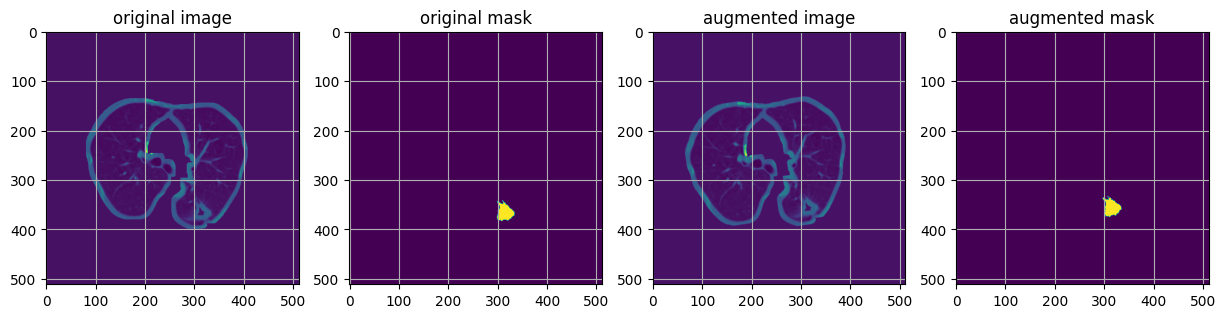

In [800]:
f, ax = plt.subplots(1,4,figsize=(15,15))
ax[0].imshow(image0[:,:,0])
ax[0].grid()
ax[1].imshow(mask0[:,:,0])
ax[1].grid()
ax[2].imshow(augment0[0,:,:])
ax[2].grid()
ax[3].imshow(mask_aug[0,:,:])
ax[3].grid()
ax[0].set_title("original image")
ax[1].set_title("original mask")
ax[2].set_title("augmented image")
ax[3].set_title("augmented mask")
plt.savefig('augmented.png',dpi=300)

In [801]:
np.unique(augment0[0,:,:])

array([-0.22152003, -0.22096999, -0.2204324 , ...,  4.34197313,
        4.37911746,  4.41848836])

In [802]:
np.unique(image0[:,:,0])

array([-0.22168608, -0.22142041, -0.22128756, ...,  4.42147923,
        4.4221406 ,  4.57437611])

In [803]:
image0 = image0.reshape(512,512,1)

In [804]:
mask0 = mask0.reshape(512,512,1)